# Capítulo 4. Modelos de Entrenamiento

## <span style="color:green">1. Regresión Lineal</span>

**Modelo de Regresión Lineal**

$ y = h_b(x) = b \cdot x $

**Ecuación del Promedio de la suma de los errores al cuadro**

$ MSE(b) = \frac{1}{m} \sum_{i=1}^{m}(b^Tx^i-y^i)^2$

**Ecuación Normal**

$ \hat{b} = (x^Tx)^{-1} x^T y $

#### <span style="color:blue"> 1.1 Ecuación Normal </span>

In [10]:
# Importar las librerías, numpy, matplotlib, pandas
# 👀 numpy es la bibleoteca por exelencia de matemáticas para python
import numpy as np
#Importar matplotlib porque vamos a estar haciendo gráficas
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [11]:
#Generar el set de jueguete de datos lineales aleatorios 
X = np.random.rand(100, 1)

#Genera vector de valores que vas a estar prediciendo (añade un factor de aleatoriedad)
y = 3 + 3* X + np.random.rand(100, 1)

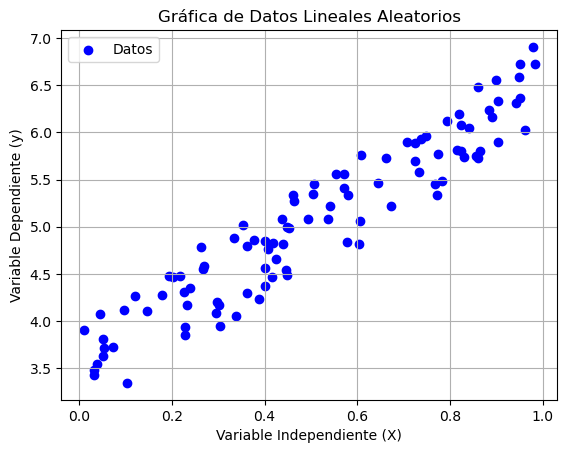

In [12]:
#Gráfica los datos del set de juguete 
plt.scatter(X, y, color='blue', label='Datos')
plt.xlabel('Variable Independiente (X)')
plt.ylabel('Variable Dependiente (y)')
plt.title('Gráfica de Datos Lineales Aleatorios')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
#Agregar el valor de x0
X_b = np.c_[np.ones((100, 1)), X]
#Aplicar la ecuación normal 
param = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
#Visualiza  
param


array([[3.57098602],
       [2.93448585]])

👀: Aquí no tendrán los mismos datos que yo, es normal por los factores de aleatoriedad

📝:El primer valor de la matriz es la pendiente y el segundo es la intersección 

In [16]:
#Prueba estes datos con un vector de prueba
X_nuevo = np.array([[0], [1]])

In [17]:
#Agregar X0=1
X_nuevo_b = np.c_[np.ones((2, 1)), X_nuevo]

In [18]:
#Hacer las predicciones con la ecuación normal
y_pred = X_nuevo_b.dot(param)
y_pred

array([[3.57098602],
       [6.50547187]])

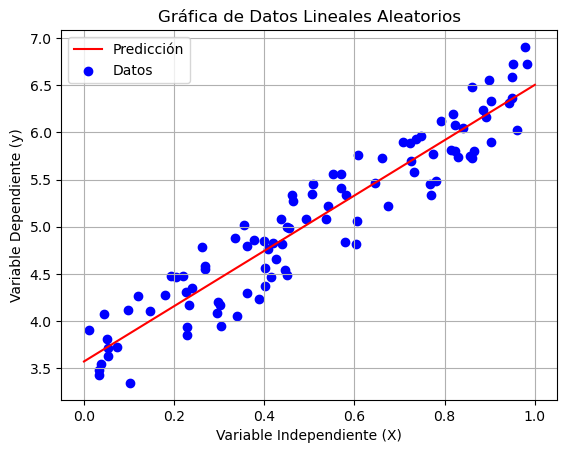

In [19]:
#Grafica la regresión con los datos originales y la predicción
plt.plot(X_nuevo, y_pred, "r-", label="Predicción")
plt.scatter(X, y, color='blue', label='Datos')
plt.xlabel('Variable Independiente (X)')
plt.ylabel('Variable Dependiente (y)')
plt.title('Gráfica de Datos Lineales Aleatorios')
plt.legend()
plt.grid(True)
plt.show()

#### <span style="color:blue"> 1.2 Regresor Linear de Scikit </span>

In [21]:
#Haz la regresión con scikit 
from sklearn.linear_model import LinearRegression

reg_lig = LinearRegression()

reg_lig.fit(X, y)
#Cálcula la intersección y la pendiente con este método
print(f"""
Interseccion: {reg_lig.intercept_}\n\n
Pendiente: {reg_lig.coef_}
""")


Interseccion: [3.57098602]


Pendiente: [[2.93448585]]



Los parámetros son iguales a los que obtuvimos en el método anterior. En este caso, tendrías que evaluar el costo 💸 que implica cada método a tu computadora. 

***

## <span style="color:green">2. Descenso del Gradiente</span>

Algoritmo de optimización. Signfica una alternativa a la ecuación normal

#### <span style="color:blue"> 2.1 Descenso del Gradiente por Lote</span>

**Derivada parcial de la función de costo (MSE)**

$ \frac{\partial}{\partial b} J(b) = \frac{2}{m} \sum_{i=1}^{m}(b^Tx^i-y^i)x^i$

**Vector del Gradiente de la función de costo** 

$ \bigtriangledown_b MSE(b) = [\frac{\partial}{\partial b_1} MSE(b_1), \frac{\partial}{\partial b_2} MSE(b_2) ,....\frac{\partial}{\partial b_m} MSE(b_m)] = \frac{2}{m} X^T(Xb-y) $

**Step del descenso del Gradiente**

$ b^{+} = b-n\bigtriangledown_b MSE(b) $

In [33]:
# Definir la tasa de aprendizaje (ra)
lr_rate = 0.1
#Definir las iteraciones. 1000 es un estándar. En 1000 se va a detener
iteraciones = 1000
#Número de datos 
m = 100
#Incializa la pendiente 
b = np.random.rand(2, 1)

In [34]:
#Hacer el programa para el descenso del gradiente
for iteracion in range(iteraciones):
    gradiente = 2 / m * X_b.T.dot(X_b.dot(b) - y)
    b = b - lr_rate * gradiente
    #Expresión a manera de ágebra lineal de los mínimos cuadrados (función de costo)
b
    

array([[3.57098757],
       [2.934483  ]])

Los resultados nos da extremadamente cercano a los datos obtenidos con la ecuación normal. Ojo: recuerda que el descenso del gradiente es un método de aproximación 

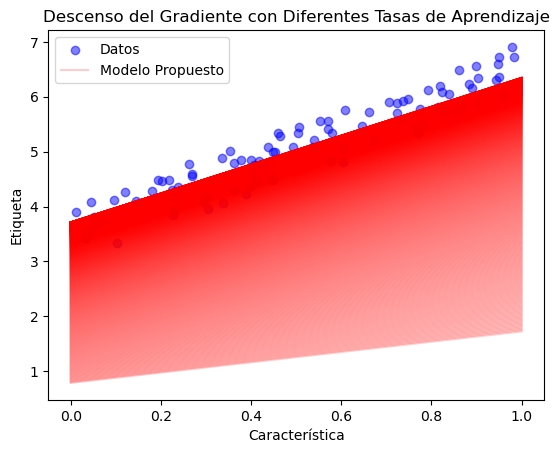

array([[3.71165291],
       [2.63227966]])

In [36]:
#Repetir el ejercicio pero con ritmo de tasa de aprendizaje diferente 
# Definir la tasa de aprendizaje (ra)
lr_rate = 0.002
#Definir las iteraciones. 1000 es un estándar. En 1000 se va a detener
iteraciones = 1000
#Número de datos 
m = 100
#Incializa la pendiente 
b = np.random.rand(2, 1)

plt.scatter(X, y, label = "Datos", alpha=0.5, color='blue')

#Visualiza los modelos que va proponiendo hasta llegar a la predicción final 
#Hacer el programa para el descenso del gradiente
for iteracion in range(iteraciones):
    gradiente = 2 / m * X_b.T.dot(X_b.dot(b) - y)
    b = b - lr_rate * gradiente
    y_nuevo = X_nuevo_b.dot(b)
    plt.plot(X_nuevo, y_nuevo, "r-", alpha=0.2, label="Modelo Propuesto" if iteracion == 0 else "")
    #Expresión a manera de ágebra lineal de los mínimos cuadrados (función de costo)

# Añadir etiquetas y título
plt.xlabel('Característica')
plt.ylabel('Etiqueta')
plt.title('Descenso del Gradiente con Diferentes Tasas de Aprendizaje')
plt.legend()
plt.show()
b




**Ejercicio**: Varía la tasa de aprendizaje y los número de pasos para observar como funciona el gradiente de tipo batch 

***

#### <span style="color:blue"> 2.2 Descenso del Gradiente Estocástico</span>

Debido a qué la complejidad computacional del descenso del gradiente de lote es alto, podemos ver el descenso del gradiente estocástico para poder mejorar las predicción.

**Ventajas**: Puedes trabajar con más datos, escapa de los mínimos locales. 
**Desventajas:** No es tan exacto como los otros métodos. Sin embargo, su variación es despreciable

In [42]:
# epochs: cuántas gradientes hará, cuántos datos seleccionará para hacer el gradiente 
epochs = 50
m = 100
#Calendario de aprendizaje, sirve para definir el ritmo de aprendizaje
t0, t1 = 5, 50
#Definir el horario de aprendizaje
def horario_aprendizaje(t):
    return t0 / (t + t1)

#Definir los 2 valores con lo que van a empezar
b = np.random.rand(2, 1)
#Definir la función 
for epoch in range(epochs):
    for i in range(m):
        #Genera un índice aleatorio
        random_index = np.random.randint(m)
        #Valor x de la coordenada que seleccionamos al azar
        xi = X_b[random_index:random_index + 1]
        #Valor y de la coordenada que seleccionamos al azar
        yi = y[random_index:random_index + 1]
        #Calcular el gradiente (Resultado de la derivada parcial)
        gradientes = 2 * xi.T.dot(xi.dot(b) - yi)
        #Calcular el ritmo de aprendizaje
        ra = horario_aprendizaje(epoch * m + i)
        #Calcular los parámetros de intersección y pendiente 
        b = b - ra * gradientes

print(f"""
Valores de Descenso del Gradiente Estocástico: {b}\n\n
Valores de Ecuacion normal: {param}
""")


Valores de Descenso del Gradiente Estocástico: [[3.57635648]
 [2.90977289]]


Valores de Ecuacion normal: [[3.57098602]
 [2.93448585]]



Aunque existe variación con el resultado de los métodos anteriores, la diferencia es mínima

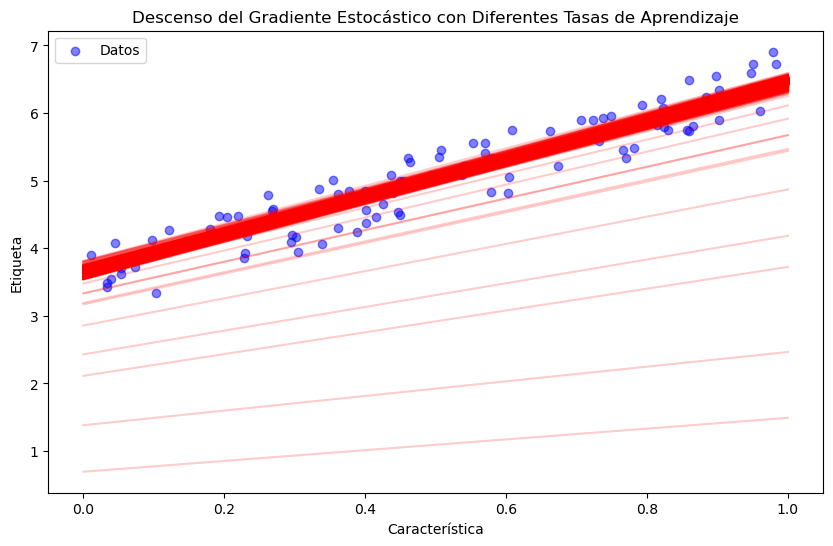


Valores de Descenso del Gradiente Estocástico: [[3.59438061]
 [2.91869143]]


Valores de Ecuacion normal: [[3.57098602]
 [2.93448585]]



In [44]:
# #Repetir el ejercicio pero desplegando cada gradiente realizado 
# epochs: cuántas gradientes hará, cuántos datos seleccionará para hacer el gradiente 
epochs = 50
m = 100
#Calendario de aprendizaje, sirve para definir el ritmo de aprendizaje
t0, t1 = 5, 50
#Definir el horario de aprendizaje
def horario_aprendizaje(t):
    return t0 / (t + t1)

#Definir los 2 valores con lo que van a empezar
b = np.random.rand(2, 1)

# Agregar tamaño
plt.figure(figsize=(10, 6))

#Agrega un scatterplot para ver los datos
plt.scatter(X, y, label='Datos',alpha=0.5, color='blue')
#Definir la función 
for epoch in range(epochs):
    for i in range(m):
        #Genera un índice aleatorio
        random_index = np.random.randint(m)
        #Valor x de la coordenada que seleccionamos al azar
        xi = X_b[random_index:random_index + 1]
        #Valor y de la coordenada que seleccionamos al azar
        yi = y[random_index:random_index + 1]

        y_nuevo = X_nuevo_b.dot(b)
        #Grafica las líneas rojas que simbolizan los diferentes gradientes a través de las iteraciones.
        plt.plot(X_nuevo, y_nuevo, "r-",alpha=0.2)
        
        #Calcular el gradiente (Resultado de la derivada parcial)
        gradientes = 2 * xi.T.dot(xi.dot(b) - yi)
        #Calcular el ritmo de aprendizaje
        ra = horario_aprendizaje(epoch * m + i)
        #Calcular los parámetros de intersección y pendiente 
        b = b - ra * gradientes

# Añadir etiquetas y título
plt.xlabel('Característica')
plt.ylabel('Etiqueta')
plt.title('Descenso del Gradiente Estocástico con Diferentes Tasas de Aprendizaje')
plt.legend()
plt.show()
print(f"""
Valores de Descenso del Gradiente Estocástico: {b}\n\n
Valores de Ecuacion normal: {param}
""")

In [45]:
#Hacerlo con scikit 
from sklearn.linear_model import SGDRegressor
#La toleración es el límite menor al valor de la suma de los errores al cuadrado 
SGD = SGDRegressor(max_iter=10_000, tol=1e-3, penalty=None, eta0=0.1)
#.ravel: te genera una lista normal
SGD.fit(X, y.ravel())
#Sacar los parámetros, la intersección y la pendiente 
print(f"""
Interseccion: {SGD.intercept_}\n
Pendiente: {SGD.coef_}\n
VS\n
La ecuacion lineal: {param}
""")


Interseccion: [3.67493222]

Pendiente: [2.77617442]

VS

La ecuacion lineal: [[3.57098602]
 [2.93448585]]



In [46]:
#Visualiza la lista normal que genera .ravel
y.ravel()

array([4.78248307, 6.0514692 , 6.73071348, 4.8340971 , 5.69699275,
       5.55463889, 5.90421745, 4.08910623, 6.081538  , 3.90458733,
       3.80868338, 5.33322968, 4.46694712, 4.37178177, 4.99557855,
       4.10463377, 5.81668913, 4.58679603, 5.56097851, 3.42790692,
       5.08101249, 5.41439079, 4.54177261, 6.90751236, 5.34047318,
       4.47534315, 4.47844371, 4.30793132, 4.23418479, 5.75350162,
       5.33986492, 4.17385864, 6.55174553, 3.71146879, 5.58380169,
       4.55372006, 6.24005062, 6.02400669, 5.22022039, 5.80019137,
       5.21822113, 4.46446019, 6.12535394, 3.48487761, 3.54372448,
       4.56625512, 5.9308106 , 5.96253545, 4.85335372, 6.59016153,
       5.4867395 , 6.72578898, 4.34827045, 4.28100216, 5.72775734,
       4.76396339, 4.17107072, 3.85449218, 4.26354275, 4.85428319,
       5.45314858, 5.08558112, 4.82035059, 4.19968402, 4.81516947,
       5.7706076 , 3.62395227, 5.08335255, 6.20121446, 5.80445586,
       6.1604257 , 5.34619057, 5.46931585, 4.05730934, 4.82531

👀: Con este método si existió una variación importante en los resultados obtenidos. Es cuestión de criterio el sacrificar exactitud por costo computacional o viceversa.

***

## <span style="color:green">3. Regresión polinomial</span>

Regresión polinomial es una regresión linel a la cual le agregamos ecuaciones con potencia más elevada

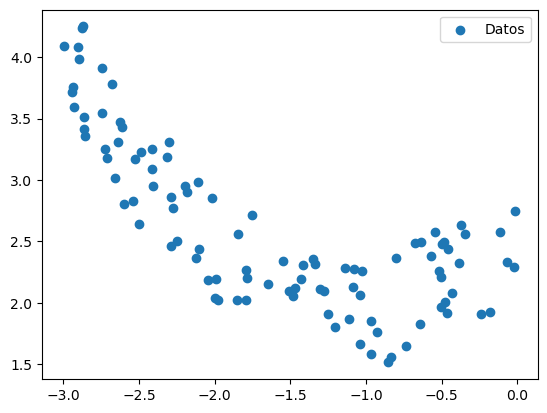

In [51]:
#Generar set de datos de juguete. Añade un toque de aleatoriedad 🧙🏻‍♀️
m = 100
X = 3 * np.random.rand(m, 1) - 3
#Elevar la ecuación al 2
y = 2 + X + 0.5 * X ** 2 + np.random.rand(m, 1)
#Gráfica el set de datos 
plt.scatter(X, y, label="Datos")
plt.legend()
plt.show()

No hay una función en scikit para hacer regresiones polinomiales como tal. Pero podemos utilizar PolynomialFeature que toma los valores de x y los eleva a una potencia especificada. 

In [53]:
#Importar PolynomialFeatures con una potencia 2
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly.fit_transform(X)

In [54]:
#Hacer una regresión lineal sobre de los datos 
reg_lin = LinearRegression()
reg_lin.fit(X_poly, y)

print(f"""
Interseccion: {reg_lin.intercept_}\n
Pendiente: {reg_lin.coef_}\n
""")


Interseccion: [2.57427564]

Pendiente: [[1.08042064 0.5168568 ]]




Primero aparece el dato de la intersección y luego aparece los coeficientes de de x y x2, respectivamente

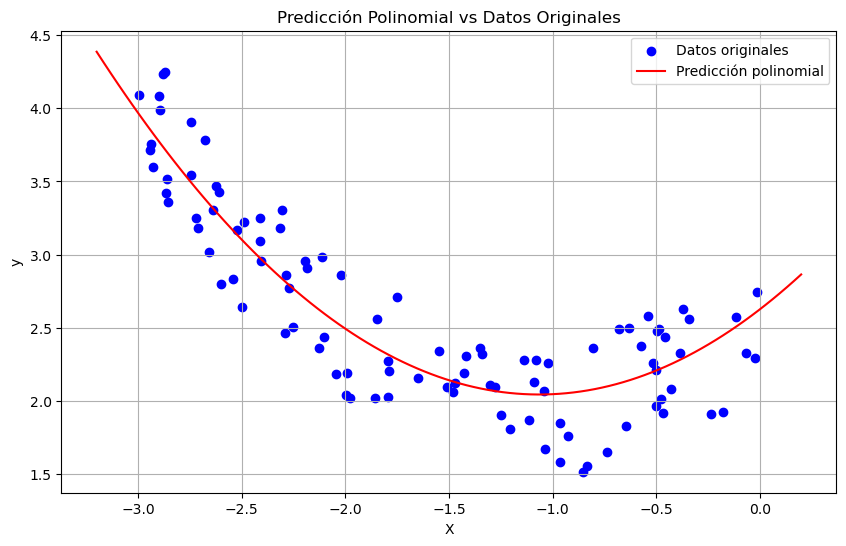

In [56]:
#Graficar la predicción de PolynomialFeatures y los datos originales
X_nuevo = np.linspace(-3.2, 0.2, 100)
y_nuevo =  2.62516116 + 1.09325867 * X_nuevo + 0.51371953 * X_nuevo ** 2
#escribir la fórmula a partir del array de arriba 
# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos originales')
plt.plot(X_nuevo, y_nuevo, 'r-', label='Predicción polinomial')
plt.title('Predicción Polinomial vs Datos Originales')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

**Ejercicio**: calcular la suma de los errores al cuadrado  y compararlo con una predicción lineal

In [58]:
from sklearn.metrics import mean_squared_error

# Hacer predicciones
y_pred = reg_lin.predict(X_poly)

mse = mean_squared_error(y, y_pred)

print(f"Errores al cuadrado: {mse}")

Errores al cuadrado: 0.07893553133886605



Interseccion: [1.71953492]

Pendiente: [[-0.54458983]]




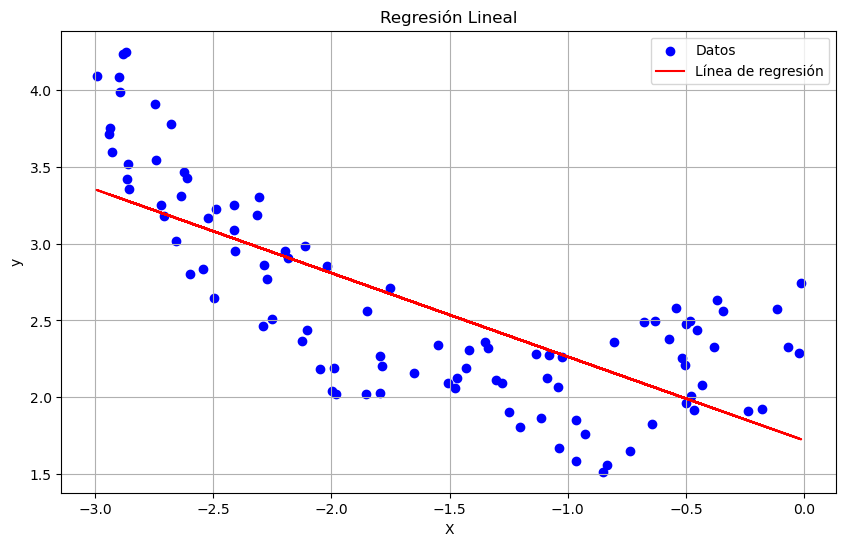

Errores al cuadrado: 0.19580005195322076


In [59]:
reg_lin = LinearRegression()
reg_lin.fit(X, y)
y_pred = reg_lin.predict(X)
print(f"""
Interseccion: {reg_lin.intercept_}\n
Pendiente: {reg_lin.coef_}\n
""")

# Graficar los datos y la línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos')
plt.plot(X, y_pred, color='red', label='Línea de regresión')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal')
plt.legend()
plt.grid(True)
plt.show()

mse = mean_squared_error(y, y_pred)
print(f"Errores al cuadrado: {mse}")

***

## <span style="color:green">4. Curvas de Aprendizaje</span>

In [62]:
#Importar mean_squared_error train_test_split para medir el error sobre los datos de entranamiento y validación
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def curvas_aprendizaje(modelo, X, y):
    #Empezamos dividiendo los datos en datos de entrenamiento y validación 
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    #Generar una lista vacías para irlas rellenando conforme se vaya calculando los errores 
    train_errors, val_errors = [], []
    #Tomar el set de entrenamiento y ajustándolo al modelo pero solo con un dato de entrenamiento y así sucesivamente
    for m in range(1, len(X_train)):
       #predecir el modelo 
       modelo.fit(X_train[:m], y_train[:m])
       #predecir el modelo
       y_train_predict = modelo.predict(X_train[:m])
       y_val_predict = modelo.predict(X_val)
       #Calcular los errores
       train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
       val_errors.append(mean_squared_error(y_val, y_val_predict))
    #graficarlos
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Set de entrenamiento")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Set de Validación")
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("Error cuadrático medio")
    plt.title("Curvas de Aprendizaje")
    plt.axis([0, 80, 0, 2])
    plt.legend()
    plt.show()

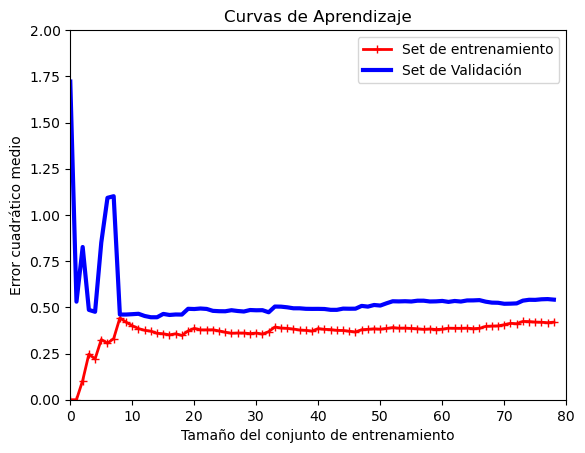

In [63]:
#Correr la curva de aprendizaje
reg_lin = LinearRegression()
curvas_aprendizaje(reg_lin, X, y)

In [64]:
#Hacer un pipeline llamado regresion_polinomial que haga una regresión polinomial y lineal 
from sklearn.pipeline import Pipeline

regresion_polinomial = Pipeline([
    ("caracteristicas polinomiales", PolynomialFeatures(degree=10, include_bias=False)),
    ("Regresion Polinomial", LinearRegression())
])

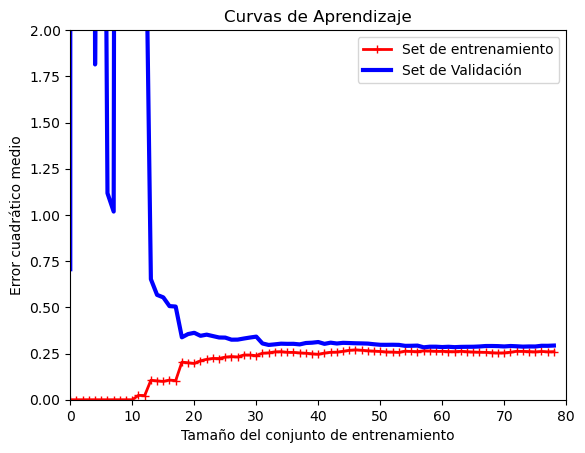

In [65]:
#Ejecutar curvas de aprendizaje a regresion_polinomial 
curvas_aprendizaje(regresion_polinomial, X, y)

In [66]:
#Variar el grado del polinomio para mejorar el rendimiento del modelo. Ejemplo:2
#Hacer un pipeline llamado regresion_polinomial que haga una regresión polinomial y lineal 
from sklearn.pipeline import Pipeline

regresion_polinomial = Pipeline([
    ("caracteristicas polinomiales", PolynomialFeatures(degree=5, include_bias=False)),
    ("Regresion Polinomial", LinearRegression())
])

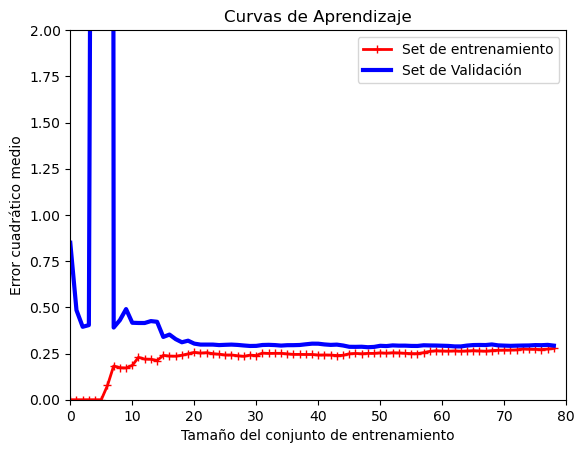

In [67]:
#Correr la curva de aprendizaje
curvas_aprendizaje(regresion_polinomial, X, y)

Generalemnte, cuando las línas se tocan signfica que llegaste a un buen modelo. No esta sobreajustado ni subajustado

***

## <span style="color:green">5. Regularización de Modelos lineales</span>

### <span style="color:blue">5.1 Regresión de Ridge o de Cresta</span>

**Término de regularización en la regresión de Ridge**

$ \alpha \sum_{i=1}^{m} b_i^2 $

**Función de costo de la regresión de Ridge**

$ MSE(b) + \alpha \frac{1}{2} \sum_{i=1}^{m} b^2 $

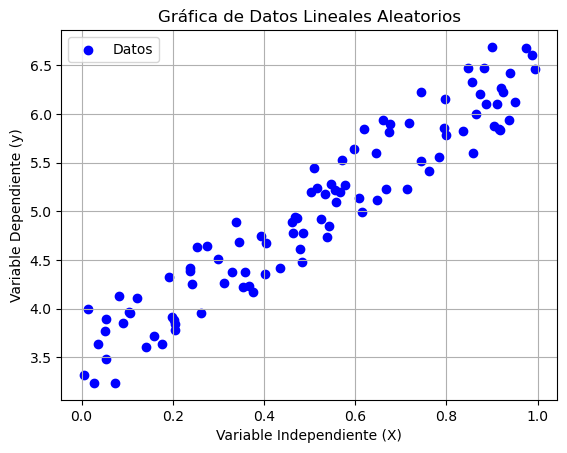

In [76]:
#Hacer un set de juguete 
X = np.random.rand(100, 1)
y = 3 + 3 * X + np.random.rand(100, 1)
plt.scatter(X, y, color='blue', label='Datos')
plt.xlabel('Variable Independiente (X)')
plt.ylabel('Variable Dependiente (y)')
plt.title('Gráfica de Datos Lineales Aleatorios')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
#Hacer una regresión lineal sencilla para comparar con la regresión de cresta
lin_reg = LinearRegression()

lin_reg.fit(X, y)

LinearRegression()

In [78]:
#Generar 100 datos para graficar la linea de predicción  
print(f"""
Interseccion: {lin_reg.intercept_}\n\n
Pendiente: {lin_reg.coef_}
""")


Interseccion: [3.46850311]


Pendiente: [[3.00871495]]



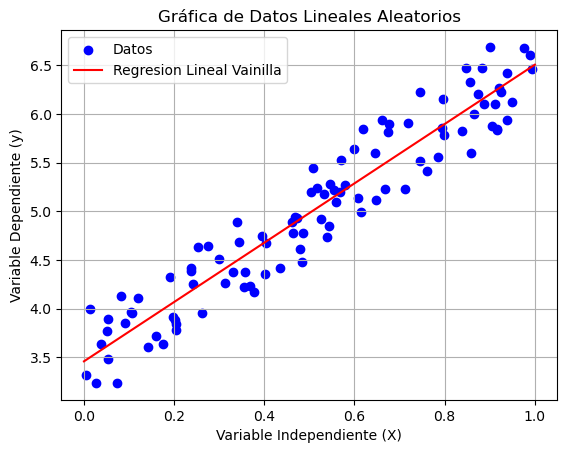

In [79]:
#graficar 
X_nuevo = np.linspace(0, 1, 100)
y_nuevo = 3.4600338 + 3.04493784 * X_nuevo

plt.scatter(X, y, color='blue', label='Datos')
plt.plot(X_nuevo, y_nuevo, "r-", label='Regresion Lineal Vainilla')
plt.xlabel('Variable Independiente (X)')
plt.ylabel('Variable Dependiente (y)')
plt.title('Gráfica de Datos Lineales Aleatorios')
plt.legend()
plt.grid(True)
plt.show()

In [80]:
#Importar Ridge para hacer nuestra regresión de cresta 
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X, y)

Ridge()

In [81]:
#Calcula los parámetros de ridge
print(f"""
Interseccion: {ridge.intercept_}\n\n
Pendiente: {ridge.coef_}
""")


Interseccion: [3.63344725]


Pendiente: [[2.68676688]]



In [82]:
#Hacer la linea de la predicción de Ridge
X_ridge = np.linspace(0, 1, 100)
y_ridge = 3.62806071 + 2.70667254 * X_ridge

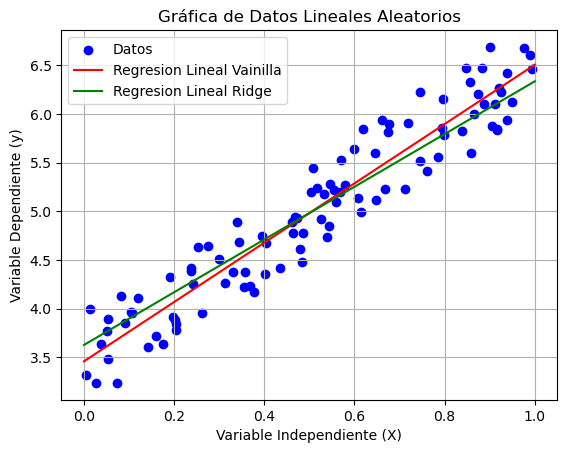

In [83]:
#graficar comparando la regresión lineal y de Ridge
plt.scatter(X, y, color='blue', label='Datos')
plt.plot(X_nuevo, y_nuevo, "r-", label='Regresion Lineal Vainilla')
plt.plot(X_ridge, y_ridge, "g-", label='Regresion Lineal Ridge')
plt.xlabel('Variable Independiente (X)')
plt.ylabel('Variable Dependiente (y)')
plt.title('Gráfica de Datos Lineales Aleatorios')
plt.legend()
plt.grid(True)
plt.show()

***

### <span style="color:blue">5.2 Regresión de Lasso</span>

**Función de costo de la regresión de regresión de Lasso**

$ MSE(b) + \alpha  \sum_{i=1}^{m} |b| $

In [88]:
#Importar lasso
from sklearn.linear_model import Lasso 
#Asignar una alpha de 0.1
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

Lasso(alpha=0.1)

In [89]:
#Calcular los parámetros de intersección y coeficientes de x 
print(f"""
Interseccion: {lasso.intercept_}\n\n
Pendiente: {lasso.coef_}
""")


Interseccion: [4.08241621]


Pendiente: [1.81044174]



In [90]:
#Hacer la linea de la predicción de lasso
X_lasso = np.linspace(0, 1, 100)
y_lasso = 4.08082155 + 1.79519192 * X_lasso

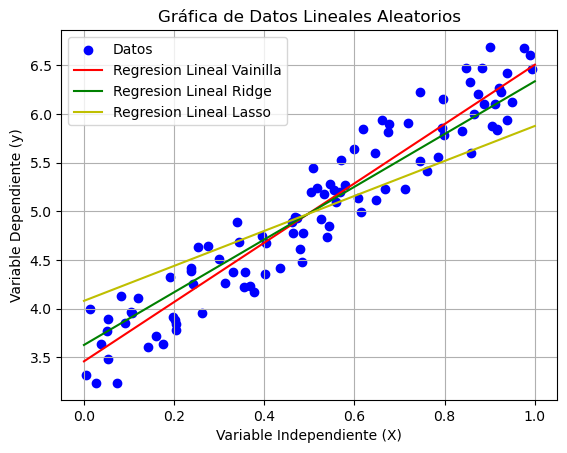

In [91]:
#graficar comparando la regresión lineal, de Ridge y de Lasso
plt.scatter(X, y, color='blue', label='Datos')
plt.plot(X_nuevo, y_nuevo, "r-", label='Regresion Lineal Vainilla')
plt.plot(X_ridge, y_ridge, "g-", label='Regresion Lineal Ridge')
plt.plot(X_lasso, y_lasso, "y-", label='Regresion Lineal Lasso')
plt.xlabel('Variable Independiente (X)')
plt.ylabel('Variable Dependiente (y)')
plt.title('Gráfica de Datos Lineales Aleatorios')
plt.legend()
plt.grid(True)
plt.show()

***

### <span style="color:blue">5.3 Regresión de Red Elástica</span>

**Función de costo de la Regresión de Red Elástica**

$ MSE(b) + r\alpha  \sum_{i=1}^{m} |b| + \alpha \frac{1-r}{2} \sum_{i=1}^{m} b^2 $

In [115]:
#Importar ElasticNet
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)

ElasticNet(alpha=0.1)

In [119]:
#Calcular los parámetros de intersección y coeficientes de x 
print(f"""
Interseccion: {elastic_net.intercept_}\n\n
Pendiente: {elastic_net.coef_}
""")


Interseccion: [4.23798166]


Pendiente: [1.50679957]



In [121]:
#Hacer la linea de la predicción de Red Elástica
X_elastic = np.linspace(0, 1, 100)
y_elastic = 4.23798166 + 1.50679957 * X_elastic

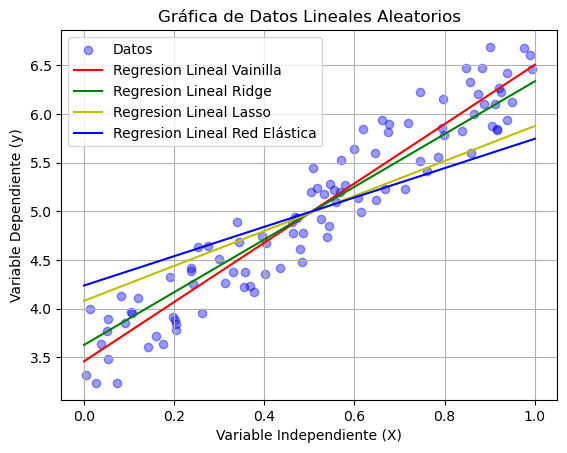

In [127]:
#graficar comparando la regresión lineal, de Ridge, de Lasso y de Red Elástica
plt.scatter(X, y, color='blue', label='Datos', alpha=0.4)
plt.plot(X_nuevo, y_nuevo, "r-", label='Regresion Lineal Vainilla')
plt.plot(X_ridge, y_ridge, "g-", label='Regresion Lineal Ridge')
plt.plot(X_lasso, y_lasso, "y-", label='Regresion Lineal Lasso')
plt.plot(X_elastic, y_elastic, 'b-', label='Regresion Lineal Red Elástica')
plt.xlabel('Variable Independiente (X)')
plt.ylabel('Variable Dependiente (y)')
plt.title('Gráfica de Datos Lineales Aleatorios')
plt.legend()
plt.grid(True)
plt.show()

***

## <span style="color:green">6. Regresión Logistica</span>

**Modelo de Regresión Logística**

$ \hat{p} = L(b^Tx) $

**Función logística**

$ L = \frac {1}{1+e^{-t}} $

**Función de Costo de la Regresión Logística**

$ J(b) = \frac{1}{m} \sum_{i=1}^{m}[ylog(\hat p)+(1-y)log(1-\hat p)] $

**Derivada de la función de Costo**

$ \frac{\partial}{\partial b} J(b) $

In [134]:
#Traer el set de datos
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }
df = pd.DataFrame(candidates, columns=['gmat', 'gpa', 'work_experience', 'admitted'])
#Visualizar el set de datos 
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


**KEY:** 
gmat: prueba de coeficiente intelectual
gpa: es tu promedio en la escuela

In [136]:
#Dividir el set de datos en en las variables predichas y la variable a predecir 
X = df[['gmat', 'gpa', 'work_experience']]
y = df['admitted']

In [140]:
#importar LogisticRegression
from sklearn.linear_model import LogisticRegression

logistic_r = LogisticRegression()
logistic_r.fit(X, y)

LogisticRegression()

In [142]:
#Hacer las predicciones 
y_pred = logistic_r.predict(X)

In [144]:
#Visualiza y_pred
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [150]:
#Utilizar la función predict_proba para visualizar la probabilidad de que sea admitido 
y_proba = logistic_r.predict_proba(X)
y_proba

array([[0.06125691, 0.93874309],
       [0.04972595, 0.95027405],
       [0.47598029, 0.52401971],
       [0.05410438, 0.94589562],
       [0.2103416 , 0.7896584 ],
       [0.01310386, 0.98689614],
       [0.93509143, 0.06490857],
       [0.1431864 , 0.8568136 ],
       [0.03734436, 0.96265564],
       [0.95816861, 0.04183139],
       [0.90268274, 0.09731726],
       [0.08345847, 0.91654153],
       [0.02070011, 0.97929989],
       [0.29751584, 0.70248416],
       [0.12390186, 0.87609814],
       [0.98177383, 0.01822617],
       [0.87317758, 0.12682242],
       [0.07857828, 0.92142172],
       [0.99223422, 0.00776578],
       [0.95264162, 0.04735838],
       [0.9259915 , 0.0740085 ],
       [0.99325265, 0.00674735],
       [0.94959431, 0.05040569],
       [0.99636402, 0.00363598],
       [0.98056281, 0.01943719],
       [0.06801174, 0.93198826],
       [0.33107257, 0.66892743],
       [0.98564866, 0.01435134],
       [0.07857828, 0.92142172],
       [0.19945909, 0.80054091],
       [0.

In [152]:
#Generar una lista para ver la probabilidad de ser admitidos y a los que no 
y_proba_no = [y_proba[i][0] for i in range(0, len(y_proba))]
y_proba_si = [y_proba[i][1] for i in range(0, len(y_proba))]

In [158]:
#Incluir estas listas en nuestro dataframe
df['predict'] = y_pred
df['proba_si'] = y_proba_no
df['proba_si'] = y_proba_si
df.head()

,gmat,gpa,work_experience,admitted,predict,proba_si
0,780,4.0,3,1,1,0.938743
1,750,3.9,4,1,1,0.950274
2,690,3.3,3,0,1,0.524020
3,710,3.7,5,1,1,0.945896
4,680,3.9,4,0,1,0.789658


In [164]:
#Visualizar el peso de la experiencia laboral, de gmat y de gpa
df.sort_values(by=['gpa'])

,gmat,gpa,work_experience,admitted,predict,proba_si
38,590,1.7,4,0,0,0.078008
9,690,1.7,1,0,0,0.041831
21,600,2.0,1,0,0,0.006747
19,590,2.3,3,0,0,0.047358
22,550,2.3,4,0,0,0.050406
6,690,2.3,1,0,0,0.064909
27,580,2.3,2,0,0,0.014351
35,650,2.3,1,0,0,0.026660
10,610,2.7,3,0,0,0.097317
31,620,2.7,2,0,0,0.047862


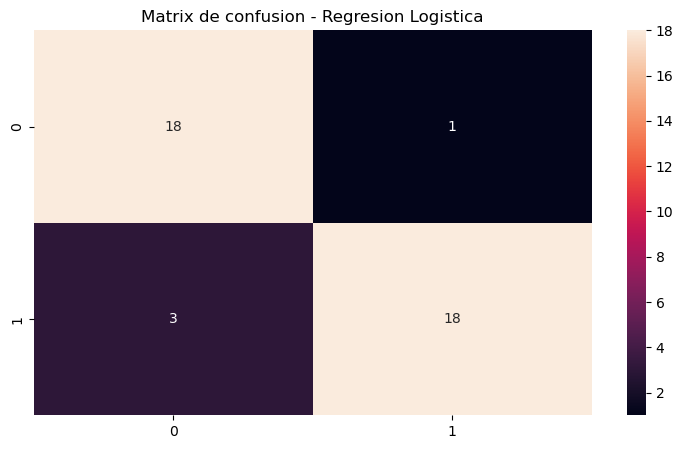

In [167]:
#Evaluar la regresión con métricas como la matriz de confusión
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred, y)

fig, axs = plt.subplots(1, 1, figsize=(9, 5))
sns.heatmap(cm, annot=True, ax=axs)
plt.title("Matrix de confusion - Regresion Logistica")
plt.show()

In [169]:
#Evaluar la regresión con métricas como f1_score
from sklearn.metrics import f1_score

f1_score(y_pred, y)

0.9

## <span style="color:green">6. Regresión Softmax</span>

$ claseA(x) = (b^A)^T x $

$ claseB(x) = (b^B)^T x $

$ claseC(x) = (b^C)^T x $

$\hat p_A = L(claseA(x)) $

$ \hat p_B = L(claseB(x))$

$ \hat p_C = L(claseC(x))$

$ L = \frac{e^x}{\sum_{i=1}^{m} e^x }  $

In [179]:
#Importar LogisticRegression
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(multi_class='multinomial')

softmax_reg.fit(X, y)

y_pred_softmax = softmax_reg.predict(X)

In [181]:
y_pred_softmax

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

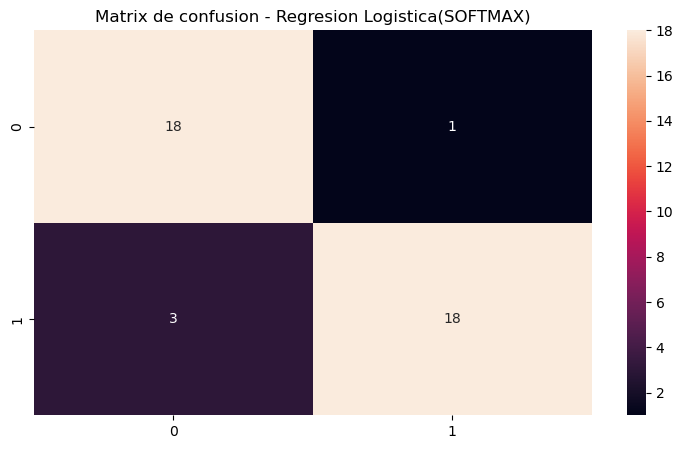

In [183]:
cm = confusion_matrix(y_pred_softmax, y)

fig, axs = plt.subplots(1, 1, figsize=(9, 5))
sns.heatmap(cm, annot=True, ax=axs)
plt.title("Matrix de confusion - Regresion Logistica(SOFTMAX)")
plt.show()

In [185]:
from sklearn.metrics import f1_score

f1_score(y_pred_softmax, y)

0.9